In [58]:
import numpy as np
import matplotlib.pyplot as plt

# 1-D example
n = 10**6
x = np.random.normal(5.0, 2.5, n)

# 2-D (grid) example
N = 10000
X = np.random.normal(5.0, 2.5, (N,N))

# 2-D Table oriented example
Nr = 100000
Nc = 15 # Number of data columns
sample_means = np.linspace(1,Nc+1,Nc) # Mean of each variable just increases by 1
sample_stdevs = 10*np.random.rand(Nc) # Standard deviation of each variable 
Xdtable = np.zeros((Nr,Nc))
for i in range(Nc):
    Xdtable[:,i] = np.random.normal(sample_means[i], sample_stdevs[i], Nr)


In [48]:
def old_skool_mean(x_in):
    sum_x = 0.0

    for i, xi in enumerate(x_in):
        sum_x += xi
    
    return sum_x/x_in.size
    
def better_mean(x_in):
    
    return x_in.sum()/x_in.size

def best_mean(x_in):
    
    return x_in.mean()


In [49]:
t_os = %timeit -o old_skool_mean(x)
t_better = %timeit -o better_mean(x)
t_best = %timeit -o best_mean(x)

58.6 ms ± 525 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
187 μs ± 527 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
190 μs ± 1.56 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


#### Verify The Answer for Each

In [71]:
output_1D = f'''
Output Means for:
\tOld Skool Method: \t{old_skool_mean(x):.{10}f}
\tBetter Method: \t\t{better_mean(x):.{10}f}
\tBest Method: \t\t{best_mean(x):.{10}f}
'''

print(output_1D)


Output Means for:
	Old Skool Method: 	5.0015890474
	Better Method: 		5.0015890474
	Best Method: 		5.0015890474



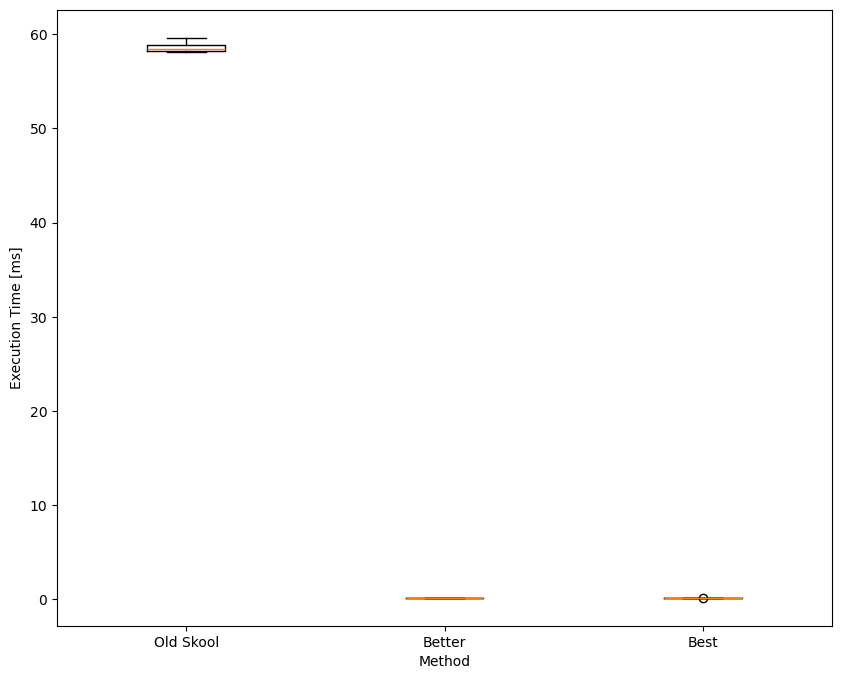

In [50]:
plt.figure(figsize=(10,8))
plt.boxplot(1000*np.array([t_os.timings,t_better.timings,t_best.timings]).T)
plt.xticks([1, 2, 3], ['Old Skool', 'Better', 'Best'])
plt.ylabel('Execution Time [ms]')
plt.xlabel('Method')
plt.show()

In [51]:
def old_skool_mean_2D(x_in):
    sum_x = 0.0

    for ind, xi in np.ndenumerate(x_in):
        sum_x += xi
    
    return sum_x/x_in.size
    
def better_mean_2D(x_in):
    
    return x_in.sum()/x_in.size

def best_mean_2D(x_in):
    
    return x_in.mean()


In [52]:
t_os_2D = %timeit -o old_skool_mean_2D(X)
t_better_2D = %timeit -o better_mean_2D(X)
t_best_2D = %timeit -o best_mean_2D(X)

16.4 s ± 145 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
18.8 ms ± 89.1 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
19.5 ms ± 703 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### Verify The Answer for Each

In [72]:
output_2D = f'''
Output Means for:
\tOld Skool Method: \t{old_skool_mean_2D(X):.{10}f}
\tBetter Method: \t\t{better_mean_2D(X):.{10}f}
\tBest Method: \t\t{best_mean_2D(X):.{10}f}
'''

print(output_2D)


Output Means for:
	Old Skool Method: 	4.9998145798
	Better Method: 		4.9998145798
	Best Method: 		4.9998145798



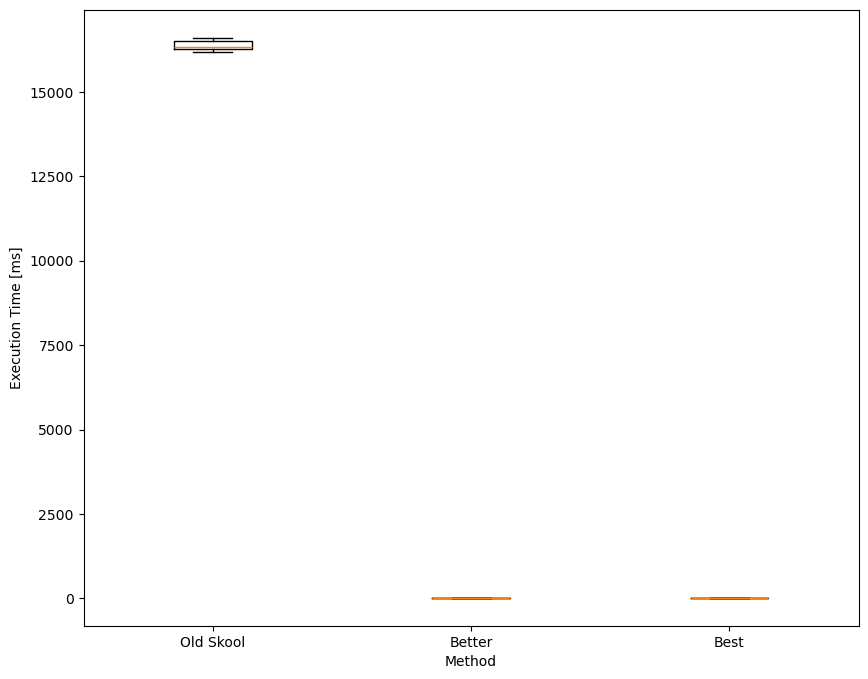

In [53]:
plt.figure(figsize=(10,8))
plt.boxplot(1000*np.array([t_os_2D.timings,t_better_2D.timings,t_best_2D.timings]).T)
plt.xticks([1, 2, 3], ['Old Skool', 'Better', 'Best'])
plt.ylabel('Execution Time [ms]')
plt.xlabel('Method')
plt.show()

In [79]:
def old_skool_mean_dtable(x_in):
    
    nr, nc = x_in.shape
    
    mean_x = np.zeros(nc)
    sum_x = np.zeros(nc)

    for col in np.arange(nc):  
        for row, xi in np.ndenumerate(x_in[:,col]):
            sum_x[col] += xi

        mean_x[col] = sum_x[col]/x_in.shape[0]    
    return mean_x
    
def better_mean_dtable(x_in):
    
    return x_in.sum(axis=0)/x_in.shape[0]

def best_mean_dtable(x_in):
    
    return x_in.mean(axis=0)

In [80]:
t_os_dtable = %timeit -o old_skool_mean_dtable(Xdtable)
t_better_dtable = %timeit -o better_mean_dtable(Xdtable)
t_best_dtable = %timeit -o best_mean_dtable(Xdtable)

352 ms ± 1.97 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
939 μs ± 2.9 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
942 μs ± 3.32 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


#### Verify The Answer for Each

In [89]:
output_dtable = f'''
Output Means for:
\tOld Skool Method: {np.array2string(old_skool_mean_dtable(Xdtable),formatter={'float': lambda x: f'{x:.10f}'})}
\tBetter Method: {np.array2string(better_mean_dtable(Xdtable),formatter={'float': lambda x: f'{x:.10f}'})}
\tBest Method: {np.array2string(best_mean_dtable(Xdtable),formatter={'float': lambda x: f'{x:.10f}'})}
'''

print(output_dtable)


Output Means for:
	Old Skool Method: [1.0205554723 2.0730496877 3.1489593007 4.2076157426 5.2575341539
 6.3552337817 7.4268766285 8.4935768338 9.5700554551 10.6266656158
 11.7170004602 12.8121623239 13.8573293737 14.9132348699 15.9853652863]
	Better Method: [1.0205554723 2.0730496877 3.1489593007 4.2076157426 5.2575341539
 6.3552337817 7.4268766285 8.4935768338 9.5700554551 10.6266656158
 11.7170004602 12.8121623239 13.8573293737 14.9132348699 15.9853652863]
	Best Method: [1.0205554723 2.0730496877 3.1489593007 4.2076157426 5.2575341539
 6.3552337817 7.4268766285 8.4935768338 9.5700554551 10.6266656158
 11.7170004602 12.8121623239 13.8573293737 14.9132348699 15.9853652863]



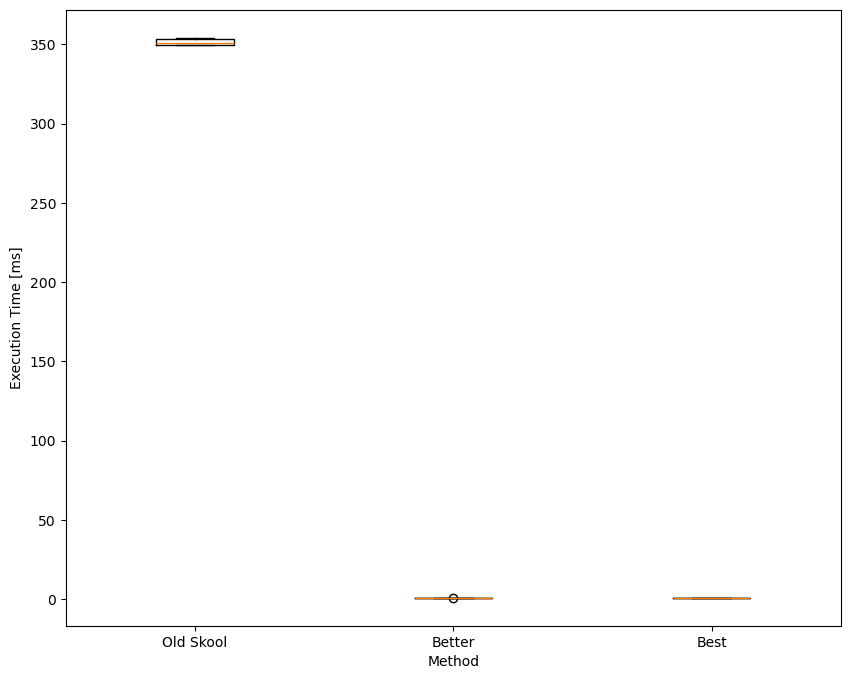

In [90]:
plt.figure(figsize=(10,8))
plt.boxplot(1000*np.array([t_os_dtable.timings,
                           t_better_dtable.timings,
                           t_best_dtable.timings]).T)
plt.xticks([1, 2, 3], ['Old Skool', 'Better', 'Best'])
plt.ylabel('Execution Time [ms]')
plt.xlabel('Method')
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
plt.boxplot(1000*np.array([t_os_dtable.timings,
                           t_better_dtable.timings,
                           t_best_dtable.timings]).T)
plt.xticks([1, 2, 3], ['Old Skool', 'Better', 'Best'])
plt.ylabel('Execution Time [ms]')
plt.xlabel('Method')
plt.show()

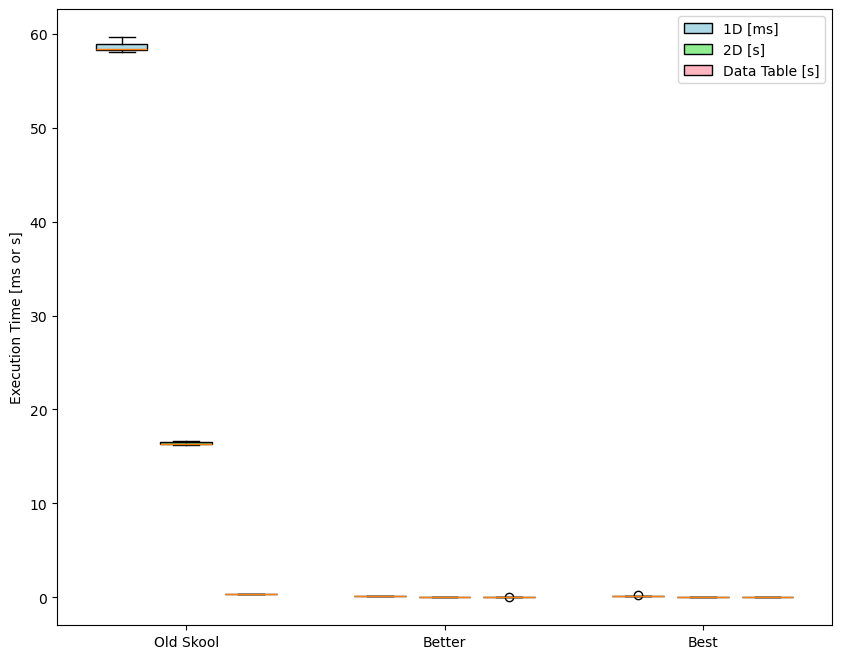

In [118]:
old_skool_1d = np.asarray(t_os.timings)
old_skool_2d = np.asarray(t_os_2D.timings)
old_skool_dtable = np.asarray(t_os_dtable.timings)

better_1d = np.asarray(t_better.timings)
better_2d = np.asarray(t_better_2D.timings)
better_dtable = np.asarray(t_better_dtable.timings)

best_1d = np.asarray(t_best.timings)
best_2d = np.asarray(t_best_2D.timings)
best_dtable = np.asarray(t_best_dtable.timings)

data_1d = [old_skool_1d*1e3, better_1d*1e3, best_1d*1e3]
data_2d = [old_skool_2d, better_2d, best_2d]
data_dtable = [old_skool_dtable, better_dtable, best_dtable]

positions_1d = [0.5, 2.5, 4.5]
positions_2d = [1.0, 3.0, 5.0]
positions_dtable = [1.5, 3.5, 5.5]

fig,ax = plt.subplots(figsize=(10,8))
bp1 = ax.boxplot(data_1d, positions=positions_1d, widths=0.4, 
                 patch_artist=True, boxprops=dict(facecolor='lightblue'))
bp2 = ax.boxplot(data_2d, positions=positions_2d, widths=0.4, 
                 patch_artist=True, boxprops=dict(facecolor='lightgreen'))
bp3 = ax.boxplot(data_dtable, positions=positions_dtable, widths=0.4, 
                 patch_artist=True, boxprops=dict(facecolor='lightpink'))
ax.set_xticks([1.0, 3.0, 5.0])
ax.set_xticklabels(['Old Skool','Better','Best'])
ax.legend([bp1['boxes'][0], bp2['boxes'][0], bp3['boxes'][0]], 
          ['1D [ms]', '2D [s]', 'Data Table [s]'])
ax.set_ylabel('Execution Time [ms or s]')
plt.show()

#### Some High-Level Conclusions

* Loops incur a cost, compared to using built-in functions. When you encounter them, it's likely that the person writing the code may have been trained in a different language (and era)
* The cost of loops increases with the number of data points/operations and is particularly evident when working with 2-D fields (which we encounter often in geoscience)
* Use built-in functions when you can (`sum`,`min`,`max`,`mean`, `std`, etc.). They're there for a reason! 
* Try to avoid loops when possible, particularly when operating on large (e.g., geospatial) datasets! We'll use some more modern approaches to do this with bigger datasets! 

In [ ]:
x.